In [1]:
#처음부터 전체

In [2]:
import numpy as np
from activation import softmax, relu, sigmoid
from loss import mse, cross_entropy_err
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [24]:
x = mnist['data']
y = mnist['target']

In [25]:
y = y.astype(np.int)
y_one= np.zeros((y.size,np.unique(y).size))

C:\Users\user\AppData\Local\Temp/ipykernel_1728/333138063.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


In [26]:
for i in range(y.size):
    y_one[i,y[i]] = 1

In [27]:
y_one

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
x.shape

(70000, 784)

In [30]:
import pickle
with open('sample_weight.pkl','rb') as f:
    network = pickle.load(f)
network['b1'].shape

(50,)

In [31]:
network['W1'].shape #행렬 연결되는 개수 확인

(784, 50)

In [32]:
#레이어 하나일 때 네트워크 = softmax
def SimpleLayer():
    x = np.random.randint(10,100,1)[0]
    y = np.random.randint(10,100,1)[0]
    W = np.random.randn(x,y)
    b = np.random.randn(y)
    network = {'W':W,'b':b}
    return network

In [33]:
init_network = SimpleLayer()

In [34]:
init_network

{'W': array([[-0.1262695 ,  0.52814874, -0.71621654, ...,  1.59372972,
         -0.57117895, -0.1548315 ],
        [ 0.11974781, -1.18123498, -0.46815451, ...,  0.10215747,
         -0.99346763, -0.67888926],
        [-0.77836194, -0.98161259,  1.64443192, ...,  0.54766162,
          0.23945011,  0.6278968 ],
        ...,
        [-0.5468373 , -0.60507881, -0.1578013 , ...,  0.43728188,
         -1.59631099, -1.35847462],
        [ 2.28739796, -0.17840818,  1.11899837, ...,  0.24899766,
          1.07382777, -0.75483971],
        [-0.23844986, -1.21770171,  0.07823909, ...,  0.3162476 ,
          0.62519205,  0.53482597]]),
 'b': array([-0.17171245,  0.10049626,  0.49389346, -0.1324506 ,  0.46018646,
         0.81427347,  0.92475752, -1.18765042, -0.95405845,  0.42765134,
        -0.6358387 ,  0.31332196, -0.20969231,  0.19139175,  0.18332902,
        -1.38696169, -0.37807653, -1.56684173,  0.07022612,  1.46908099,
        -1.77577249,  0.32906035,  0.19094443,  0.64135293, -0.07046215

In [35]:
init_network['W'].shape

(68, 78)

In [38]:
def SimpleLayer(x,y):
    W = np.random.randn(x,y)
    b = np.random.randn(y)
    network = {'W':W,'b':b}
    return network

In [39]:
init_network = SimpleLayer(X.shape[1],y_one.shape[1])

In [40]:
W,b = init_network['W'], init_network['b']

In [41]:
y = np.apply_along_axis(softmax,1,(np.dot(x,W)+b))

In [43]:
cross_entropy_err(y,y_one) #y예측값

1.4277960500610714

In [45]:
sum(np.argmax(np.apply_along_axis(softmax,1,(np.dot(x,W)+b)),axis=1) == np.argmax(y_one,axis=1))/70000

0.11347142857142857

In [72]:
def softmax(x):
    c = np.max(x,axis=1).reshape(-1,1)
    a = x - c
    return np.exp(a)/np.sum(np.exp(a),axis=1).reshape(-1,1)

In [73]:
x = np.random.randn(4,3)

In [74]:
softmax(x)

array([[0.43523262, 0.34991242, 0.21485496],
       [0.19021111, 0.49431796, 0.31547093],
       [0.78183638, 0.10224379, 0.11591983],
       [0.54763476, 0.17076764, 0.28159759]])

In [75]:
np.max(x,axis=1).reshape(-1,1)

array([[-0.91793949],
       [ 0.34455841],
       [ 0.57872819],
       [ 0.43027507]])

In [76]:
y.shape

(70000, 10)

In [77]:
def fx(x):
    return x**2+2*x

In [78]:
h = 1e-5
x = 2
(fx(x+h) - fx(x))/h

6.000009999951316

In [82]:
def diff(f,x):
    h = 1e-5
    fx = f
    return (fx(x+h)-fx(x))/h

In [80]:
diff(fx,2)

6.000009999951316

In [83]:
#인터넷에서 찾은 함수
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()
softmax(x)

1.0

In [84]:
#기울기 구해서 어떻게 바꾸는지 볼거

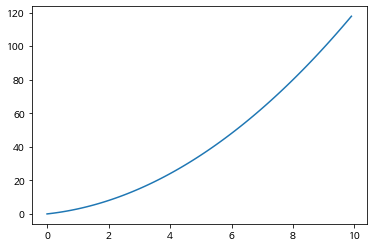

In [85]:
import matplotlib.pyplot as plt
x = np.arange(0,10,0.1)
y = fx(x)
plt.plot(x,y)

In [ ]:
#그래프x축을 4에서 10까지로 하고,그래프를 여러개를 타나내어 비교하기

In [96]:
# 다음 두 값을 각각미분(곱 러닝레이트)해서 빼주기(차이)

In [110]:
_diff(fx,np.array([1,2,3]))

array([4.00001, 6.00001, 8.00001])

In [115]:
def f2(x):
    return np.sum(x**2,axis=1)
f2(np.array([1,3]).reshape(-1,1))

array([1, 9], dtype=int32)

In [120]:
x = np.random.randint(1,10,20).reshape(10,2)

In [122]:
x

array([[5, 2],
       [6, 6],
       [5, 4],
       [7, 4],
       [1, 3],
       [1, 5],
       [9, 6],
       [4, 7],
       [4, 2],
       [5, 4]])

In [121]:
f2(x)

array([ 29,  72,  41,  65,  10,  26, 117,  65,  20,  41], dtype=int32)

In [124]:
def f2(x):
    return np.sum(x**2,axis=1).reshape(-1,1)

In [125]:
_diff(f2,x)

array([[14.00002],
       [24.00002],
       [18.00002],
       [22.00002],
       [ 8.00002],
       [12.00002],
       [30.00002],
       [22.00002],
       [12.00002],
       [18.00002]])

In [118]:
def _diff2(x):
    return

In [127]:
lr = 0.1
x = x - lr*(_diff(f2,x))

In [128]:
x

array([[ 3.599998,  0.599998],
       [ 3.599998,  3.599998],
       [ 3.199998,  2.199998],
       [ 4.799998,  1.799998],
       [ 0.199998,  2.199998],
       [-0.200002,  3.799998],
       [ 5.999998,  2.999998],
       [ 1.799998,  4.799998],
       [ 2.799998,  0.799998],
       [ 3.199998,  2.199998]])

In [130]:
lr = 0.1
for i in range(10):
    print(x)
    x = x - lr*(_diff(f2,x).reshape(-1,1))

[[ 3.599998  0.599998]
 [ 3.599998  3.599998]
 [ 3.199998  2.199998]
 [ 4.799998  1.799998]
 [ 0.199998  2.199998]
 [-0.200002  3.799998]
 [ 5.999998  2.999998]
 [ 1.799998  4.799998]
 [ 2.799998  0.799998]
 [ 3.199998  2.199998]]
[[ 2.7599968 -0.2400032]
 [ 2.1599968  2.1599968]
 [ 2.1199968  1.1199968]
 [ 3.4799968  0.4799968]
 [-0.2800032  1.7199968]
 [-0.9200032  3.0799968]
 [ 4.1999968  1.1999968]
 [ 0.4799968  3.4799968]
 [ 2.0799968  0.0799968]
 [ 2.1199968  1.1199968]]
[[ 2.25599608 -0.74400392]
 [ 1.29599608  1.29599608]
 [ 1.47199608  0.47199608]
 [ 2.68799608 -0.31200392]
 [-0.56800392  1.43199608]
 [-1.35200392  2.64799608]
 [ 3.11999608  0.11999608]
 [-0.31200392  2.68799608]
 [ 1.64799608 -0.35200392]
 [ 1.47199608  0.47199608]]
[[ 1.95359565 -1.04640435]
 [ 0.77759565  0.77759565]
 [ 1.08319565  0.08319565]
 [ 2.21279565 -0.78720435]
 [-0.74080435  1.25919565]
 [-1.61120435  2.38879565]
 [ 2.47199565 -0.52800435]
 [-0.78720435  2.21279565]
 [ 1.38879565 -0.61120435]
 [ 1

In [131]:
lr = 0.001
for i in range(1000):
    print(x)
    x = x - lr*(_diff(f2,x).reshape(-1,1))

[[ 1.51269292 -1.48730708]
 [ 0.02176284  0.02176284]
 [ 0.51632089 -0.48367911]
 [ 1.51994886 -1.48005114]
 [-0.99274904  1.00725096]
 [-1.98912107  2.01087893]
 [ 1.5272048  -1.4727952 ]
 [-1.48005114  1.51994886]
 [ 1.01087893 -0.98912107]
 [ 0.51632089 -0.48367911]]
[[ 1.51264212 -1.48735788]
 [ 0.02167577  0.02167577]
 [ 0.51625558 -0.48374442]
 [ 1.51986904 -1.48013096]
 [-0.99277806  1.00722194]
 [-1.98916461  2.01083539]
 [ 1.52709596 -1.47290404]
 [-1.48013096  1.51986904]
 [ 1.01083539 -0.98916461]
 [ 0.51625558 -0.48374442]]
[[ 1.51259153 -1.48740847]
 [ 0.02158905  0.02158905]
 [ 0.51619054 -0.48380946]
 [ 1.51978954 -1.48021046]
 [-0.99280697  1.00719303]
 [-1.98920797  2.01079203]
 [ 1.52698755 -1.47301245]
 [-1.48021046  1.51978954]
 [ 1.01079203 -0.98920797]
 [ 0.51619054 -0.48380946]]
[[ 1.51254115 -1.48745885]
 [ 0.02150267  0.02150267]
 [ 0.51612576 -0.48387424]
 [ 1.51971037 -1.48028963]
 [-0.99283576  1.00716424]
 [-1.98925116  2.01074884]
 [ 1.52687958 -1.47312042

# ======================= 나 이거 수치 크게 나옴. 이유가 뭘까

In [138]:
x = np.random.randint(90,100,20).reshape(10,2)

In [205]:
x1 = np.random.randn(100)
x2 = np.random.randn(100)
x3 = np.random.randn(100)
y = 2.5*x1 + 3.2*x2 + 4.1*x3
w1 = np.random.randn(1).reshape(1,1)

In [200]:
#미분하지않고 해석적으로 풀기 
lr = 1e-5
for i in range(1000000):
    delta = 1e-7
    fx_h = mse(np.dot(x3.reshape(-1,1),w3+delta),y) #작게 만든 비용함수
    fx = mse(np.dot(x3.reshape(-1,1),w3),y) #원래 비용함수
    w3 = w3-lr*((fx_h - fx)/delta)

In [201]:
i = 0
delta = 1e-7
mse(np.dot(X[:,i].reshape(-1,1),W[i].reshape(1,-1)+delta),y)

14622878.964401532

In [202]:
W.size #for문 3번 돌아가면 된다. 

3

In [203]:
# W.shape 을 여러번 돌리기 코딩
def grad(x,y,w):
    delta = 1e-7
    tmp = np.random.randn(1)[0]
    for i in range(w.size):
        fx_h = mse(np.dot(x[:,i].reshape(-1,1),w[i].reshape(1,-1)+delta),y)
        fx = mse(np.dot(x[:,i].reshape(-1,1),w[i].reshape(1,-1)),y)
        tmp = tmp - lr*((fx_h-fx)/delta)
        print(tmp)
    return tmp

In [204]:
grad(X,y,W)

4.639614493845101
19.185261362491246
17.139783622024652


17.139783622024652

# ====================================

In [143]:
X = np.c_[x1,x2,x3].reshape(100,3)
W = np.random.randn(3,1)

In [144]:
y.shape

(100,)

In [145]:
y.reshape(-1,1)

array([[ 13.43775806],
       [  0.82516012],
       [  1.54349939],
       [  4.26047105],
       [ -2.12554218],
       [  0.87070133],
       [-11.45397706],
       [ 13.69442915],
       [  7.53650567],
       [  1.74996481],
       [  9.14357539],
       [ -7.77922756],
       [ -7.79695575],
       [  6.41015175],
       [-14.92383041],
       [  2.85006003],
       [  5.41180874],
       [  1.26866854],
       [  4.54865043],
       [  3.33129326],
       [  0.52408676],
       [ -4.17765303],
       [  1.67265611],
       [  4.59946668],
       [  4.3974358 ],
       [ -7.11986723],
       [ -4.85480164],
       [ -5.01271659],
       [ -2.72775477],
       [ -5.42578751],
       [  5.70126281],
       [ -6.90546782],
       [ -2.25413268],
       [  6.19663759],
       [  6.68472225],
       [  1.60955213],
       [ -2.31537188],
       [ -7.75595399],
       [ -9.00518023],
       [ -7.59211609],
       [ 10.52591499],
       [  2.25052812],
       [  2.79643735],
       [  4

In [146]:
y = y.reshape(-1,1)
def fx(X,W):
    return np.dot(X,W)

In [150]:
np.dot(X,W)

array([[-1.29494546],
       [-0.15646895],
       [ 0.10930944],
       [-2.04001376],
       [ 0.00832067],
       [-0.05177157],
       [ 1.427428  ],
       [-3.03644548],
       [-0.0100175 ],
       [ 1.3861802 ],
       [-0.41354681],
       [-0.85555514],
       [ 0.50479877],
       [-1.67505332],
       [ 1.99063005],
       [-2.00459686],
       [ 1.37060705],
       [-1.18510068],
       [-1.56137255],
       [-2.28541336],
       [ 0.26871093],
       [ 1.62876686],
       [ 0.34895007],
       [ 1.6262519 ],
       [-1.25762731],
       [ 2.68127143],
       [ 1.48910817],
       [ 1.31997526],
       [-0.85475595],
       [ 2.15565004],
       [-0.48982393],
       [ 2.48792979],
       [ 2.23975747],
       [-0.37740766],
       [ 0.70863018],
       [-0.05716968],
       [-0.24712995],
       [-0.30395159],
       [ 1.58952366],
       [-1.01017624],
       [-0.95258366],
       [-0.0282866 ],
       [-2.46087288],
       [-0.83978663],
       [-1.21300803],
       [-0

In [149]:
# _diff(X,W)
mse(np.dot(X,W),y)

236396.34500757634

In [163]:
w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
w3 = np.random.uniform(low=-1.0, high=1.0)

b = np.random.uniform(low=-1.0, high=1.0)

y = 0.3 * x1 + 0.5 * x2 + 0.7 * x3 + b

In [165]:
errors = []
w1_grad = []
w2_grad = []
w3_grad = []

num_epoch=5000
learning_rate=0.5

w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
w3 = np.random.uniform(low=-1.0, high=1.0)

b1 = np.random.uniform(low=-1.0, high=1.0)
b2 = np.random.uniform(low=-1.0, high=1.0)
b3 = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    y_hat = w1 * x1 + w2 * x2 + w3 * x3 + b

    error = ((y_hat - y)**2).mean()
    if error < 0.00001:
        break
    # 미분값 적용 (Gradient)
    w1 = w1 - learning_rate * ((y_hat - y) * x1).mean()
    w2 = w2 - learning_rate * ((y_hat - y) * x2).mean()
    w3 = w3 - learning_rate * ((y_hat - y) * x3).mean()
    
    w1_grad.append(w1)
    w2_grad.append(w2)
    w3_grad.append(w3)
    
    b = b - learning_rate * (y_hat - y).mean()
    
    errors.append(error)
    
    if epoch % 5 == 0:
        print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, w3 = {3:.5f}, b = {4:.5f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))

print("----" * 15)
print("{0:2} w1 = {1:.1f}, w2 = {2:.1f}, w3 = {3:.1f}, b = {4:.1f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))

 0 w1 = 1.17338, w2 = 2.39849, w3 = 2.29264, b = -0.46259 error = 28.17466
 5 w1 = 2.35517, w2 = 3.22715, w3 = 3.99766, b = -0.10008 error = 0.06922
10 w1 = 2.48411, w2 = 3.20375, w3 = 4.09099, b = -0.03753 error = 0.00069
------------------------------------------------------------
15 w1 = 2.5, w2 = 3.2, w3 = 4.1, b = -0.0 error = 0.00001


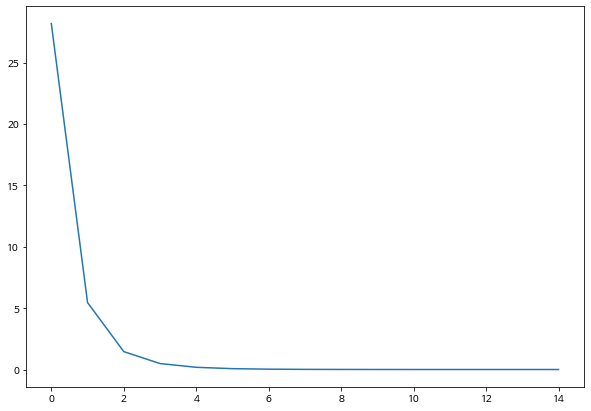

In [166]:
plt.figure(figsize=(10, 7))

plt.plot(errors)